# **Reporte del modelo Final**
---


## **1. Introducción**

Una de las bebidas más consumidas en el mundo es el café. Este producto se caracteriza por ser cultivado en diversos países y por contar con una amplia variedad de tipos. Al tratarse de una bebida apreciada por muchas personas, es importante reconocer qué define la calidad de un buen café. Entre sus principales características destacan el aroma intenso, el sabor equilibrado y un cuerpo agradable. Para resaltar cada una de estas cualidades, es fundamental un tueste adecuado que permita extraer sus notas naturales. Además, el origen del café influye significativamente en su calidad, ya que los granos cultivados en zonas de mayor altitud suelen presentar perfiles más complejos. Una preparación adecuada, que incluya el uso de agua limpia y una temperatura controlada, completa la experiencia para disfrutar de una taza perfecta. En este proyecto se busca explorar las características del café y, a partir de ellas, definir un perfil que permita identificar la calidad de esta bebida.

## **2. Datos**


Los datos utilizados en este proyecto corresponden a variedades de café evaluadas por el Instituto de la Calidad del Café (Coffee Quality Institute, CQI por sus siglas en inglés), y están disponibles públicamente a través del siguiente enlace: https://database.coffeeinstitute.org/.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Cargar el archivo CSV
df = pd.read_csv('data.csv', sep=';')
df.head(4)
# Preprocesamiento
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')
df['Flavor'] = pd.to_numeric(df['Flavor'], errors='coerce')
df['Aftertaste'] = pd.to_numeric(df['Aftertaste'], errors='coerce')
df['Cupper.Points'] = pd.to_numeric(df['Cupper.Points'], errors='coerce')
df['Moisture'] = pd.to_numeric(df['Moisture'], errors='coerce')
df['Sweetness'] = pd.to_numeric(df['Sweetness'], errors='coerce')
df['Clean.Cup'] = pd.to_numeric(df['Clean.Cup'], errors='coerce')
df = df.apply(lambda col: col.fillna(col.mean()) if col.dtype in ['float64', 'int64'] else col)
columnas = ['Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness']
for col in columnas:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convierte a numérico si no lo es
    media_columna = df.loc[df[col] != 900, col].mean()  # Calcula la media sin incluir los 900
    df[col] = df[col].replace(900, media_columna)  # Reemplaza 900 por la media

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1311 non-null   int64  
 1   Species                1311 non-null   object 
 2   Owner                  1304 non-null   object 
 3   Country.of.Origin      1310 non-null   object 
 4   Farm.Name              955 non-null    object 
 5   Lot.Number             270 non-null    object 
 6   Mill                   1000 non-null   object 
 7   ICO.Number             1162 non-null   object 
 8   Company                1101 non-null   object 
 9   Altitude               1087 non-null   object 
 10  Region                 1253 non-null   object 
 11  Producer               1078 non-null   object 
 12  Number.of.Bags         1311 non-null   float64
 13  Bag.Weight             1307 non-null   object 
 14  In.Country.Partner     1307 non-null   object 
 15  Harv

## **3. Descripción de modelos**
---


Se quiere determinar la calidad del café con base a variables como el cuerpo, la uniformidad, el balance, puntos de taza, entre otros. Con este objetivo se explorará algunas de las técnicas de aprendizaje supervisado: Análisis de regresión.

Para el análisis de regresión, se tomará una serie de variables como predictoras ('Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Moisture', 'Flavor', 'Aftertaste', 'Acidity') y una variable de respuesta continua que corresponde al puntaje total de la taza.

## **4. Entrenamiento del Modelo**
---



### 4.1 Análisis de un modelo de regresión

In [ ]:
X = df[['Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Moisture', 'Flavor', 'Aftertaste', 'Acidity']]
y = df["Total.Cup.Points"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=9)

In [ ]:
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=9)

In [ ]:
y_pred = knn.predict(X_test_scaled)
print(y_pred)

[80.29666667 80.48222222 84.16777778 83.01888889 83.51111111 82.42555556
 84.51       79.73111111 82.09111111 83.27777778 84.12111111 83.59222222
 79.41555556 83.01       81.72222222 81.08444444 83.40777778 80.75111111
 83.10222222 83.86111111 84.41777778 85.03555556 82.05555556 81.98222222
 83.45333333 78.62       83.21333333 84.07444444 81.90888889 82.19555556
 80.95038344 83.34222222 85.40777778 81.99       84.72222222 83.77
 77.91555556 84.12222222 82.99111111 79.05666667 82.23       83.40777778
 83.27777778 81.53666667 82.19666667 80.82444444 85.09333333 80.66666667
 76.84222222 82.64888889 83.86       83.11111111 85.60888889 84.51111111
 81.98222222 83.51777778 82.37       82.69444444 82.56444444 85.71222222
 82.13888889 81.95444444 84.21444444 84.14888889 82.01888889 79.43444444
 86.77888889 85.93555556 81.86888889 82.37111111 84.12111111 73.53888889
 82.57444444 84.45444444 82.63       84.02777778 81.50888889 84.01888889
 82.24111111 82.39888889 83.88888889 83.76888889 79.52777

Se definió otro modelo con el fin de mejorar las métricas obtenidas con el modelo baseline.

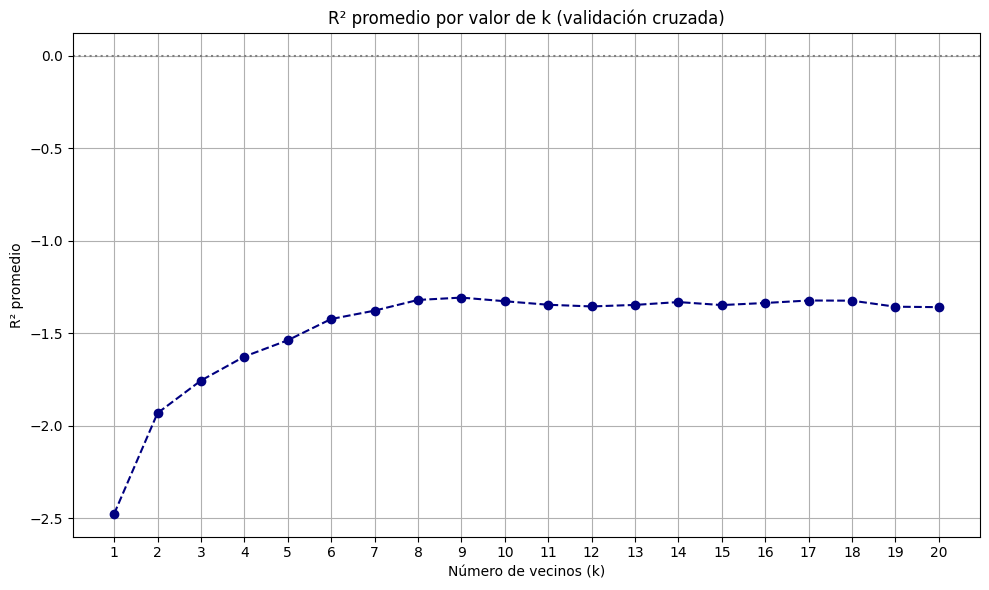

Mejor k: 9 con R² promedio de: -1.3079


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

X = df[['Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Moisture', 'Flavor', 'Aftertaste', 'Acidity']]  # ajusta si es necesario
y = df["Total.Cup.Points"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
k_values = range(1, 21)
r2_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='r2')
    r2_scores.append(np.mean(scores))

plt.figure(figsize=(10, 6))
plt.plot(k_values, r2_scores, marker='o', linestyle='--', color='navy')
plt.title("R² promedio por valor de k (validación cruzada)")
plt.xlabel("Número de vecinos (k)")
plt.ylabel("R² promedio")
plt.grid(True)
plt.xticks(k_values)
plt.axhline(0, color='gray', linestyle=':')
plt.tight_layout()
plt.show()

mejor_k = k_values[np.argmax(r2_scores)]
mejor_r2 = max(r2_scores)
print(f"Mejor k: {mejor_k} con R² promedio de: {mejor_r2:.4f}")

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Entrenar modelo
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Obtener importancia
importancia_rf = pd.Series(rf.feature_importances_, index=X.columns)
importancia_rf = importancia_rf.sort_values(ascending=False)

# Mostrar
print("Importancia según Random Forest:")
print(importancia_rf)

Importancia según Random Forest:
Flavor           0.298737
Clean.Cup        0.160714
Cupper.Points    0.131894
Aftertaste       0.129286
Sweetness        0.069176
Body             0.065385
Acidity          0.056529
Balance          0.050257
Uniformity       0.035426
Moisture         0.002597
dtype: float64


MSE: 0.7212389320778999
R² score: 0.8768268803658349


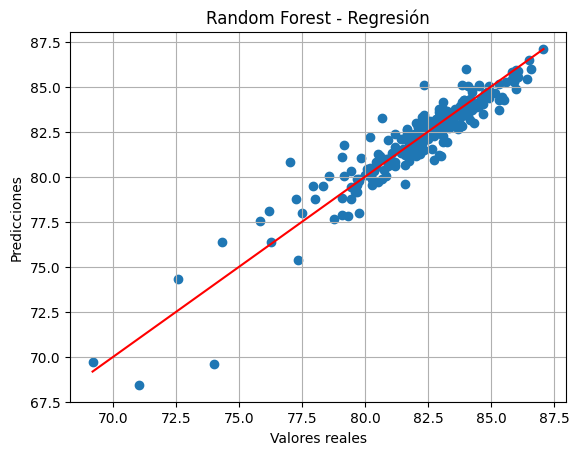

In [ ]:
X = df[['Flavor', 'Clean.Cup', 'Cupper.Points', 'Aftertaste']]
y = df["Total.Cup.Points"]

# 2. Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Crear el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 4. Entrenar el modelo
model.fit(X_train, y_train)

# 5. Hacer predicciones
y_pred = model.predict(X_test)

# 6. Evaluar el modelo
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))

# 7. Visualizar predicciones vs. valores reales
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Random Forest - Regresión")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")
plt.grid(True)
plt.show()

In [ ]:
model = RandomForestRegressor(random_state=42)

# Validación cruzada de 5 pliegues (K=5), usando R² como métrica
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Mostrar resultados
print("Scores individuales:", scores)
print("R² promedio:", np.mean(scores))
print("Desviación estándar:", np.std(scores))

Scores individuales: [-2.48333915 -0.66972953 -2.0488645  -1.60920266 -0.28085309]
R² promedio: -1.418397786702172
Desviación estándar: 0.8273459944690068


## 5.0 **Análisis de un modelo de clasificación**
---

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

<ipython-input-25-3330230609>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Variety', order=df['Variety'].value_counts().index, palette='viridis')


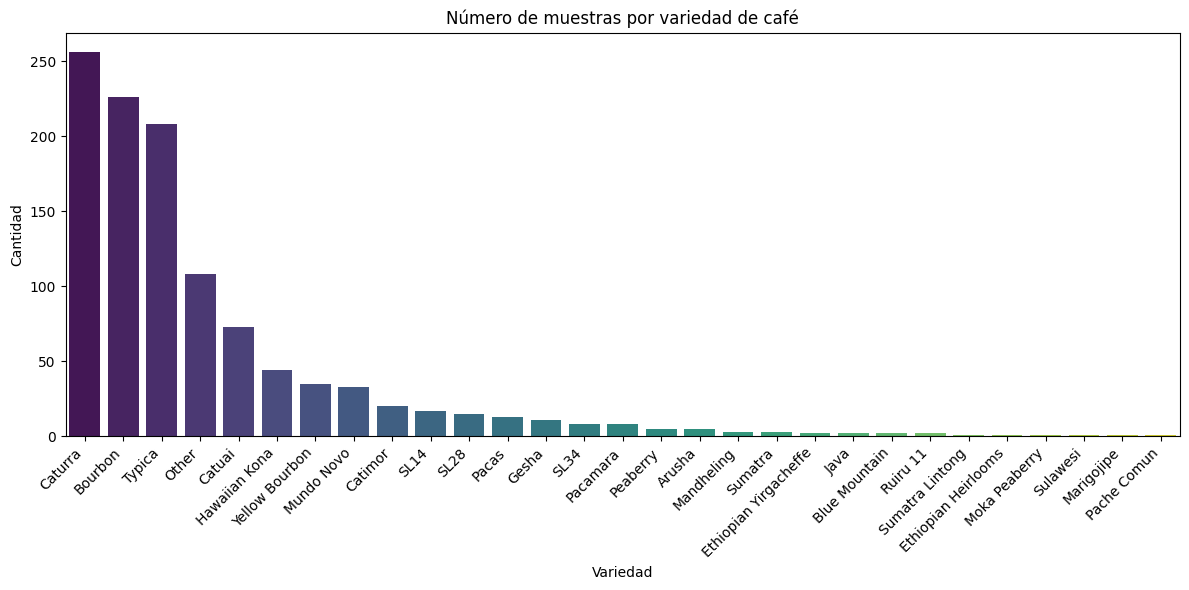

In [ ]:
X = df[['Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Moisture', 'Flavor', 'Aftertaste', 'Acidity','Total.Cup.Points']]
df_clean = df.dropna(subset=['Variety'])
y = df_clean['Variety']
X = X.loc[df_clean.index]
df['Variety'].value_counts()
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Variety', order=df['Variety'].value_counts().index, palette='viridis')
plt.title('Número de muestras por variedad de café')
plt.xlabel('Variedad')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

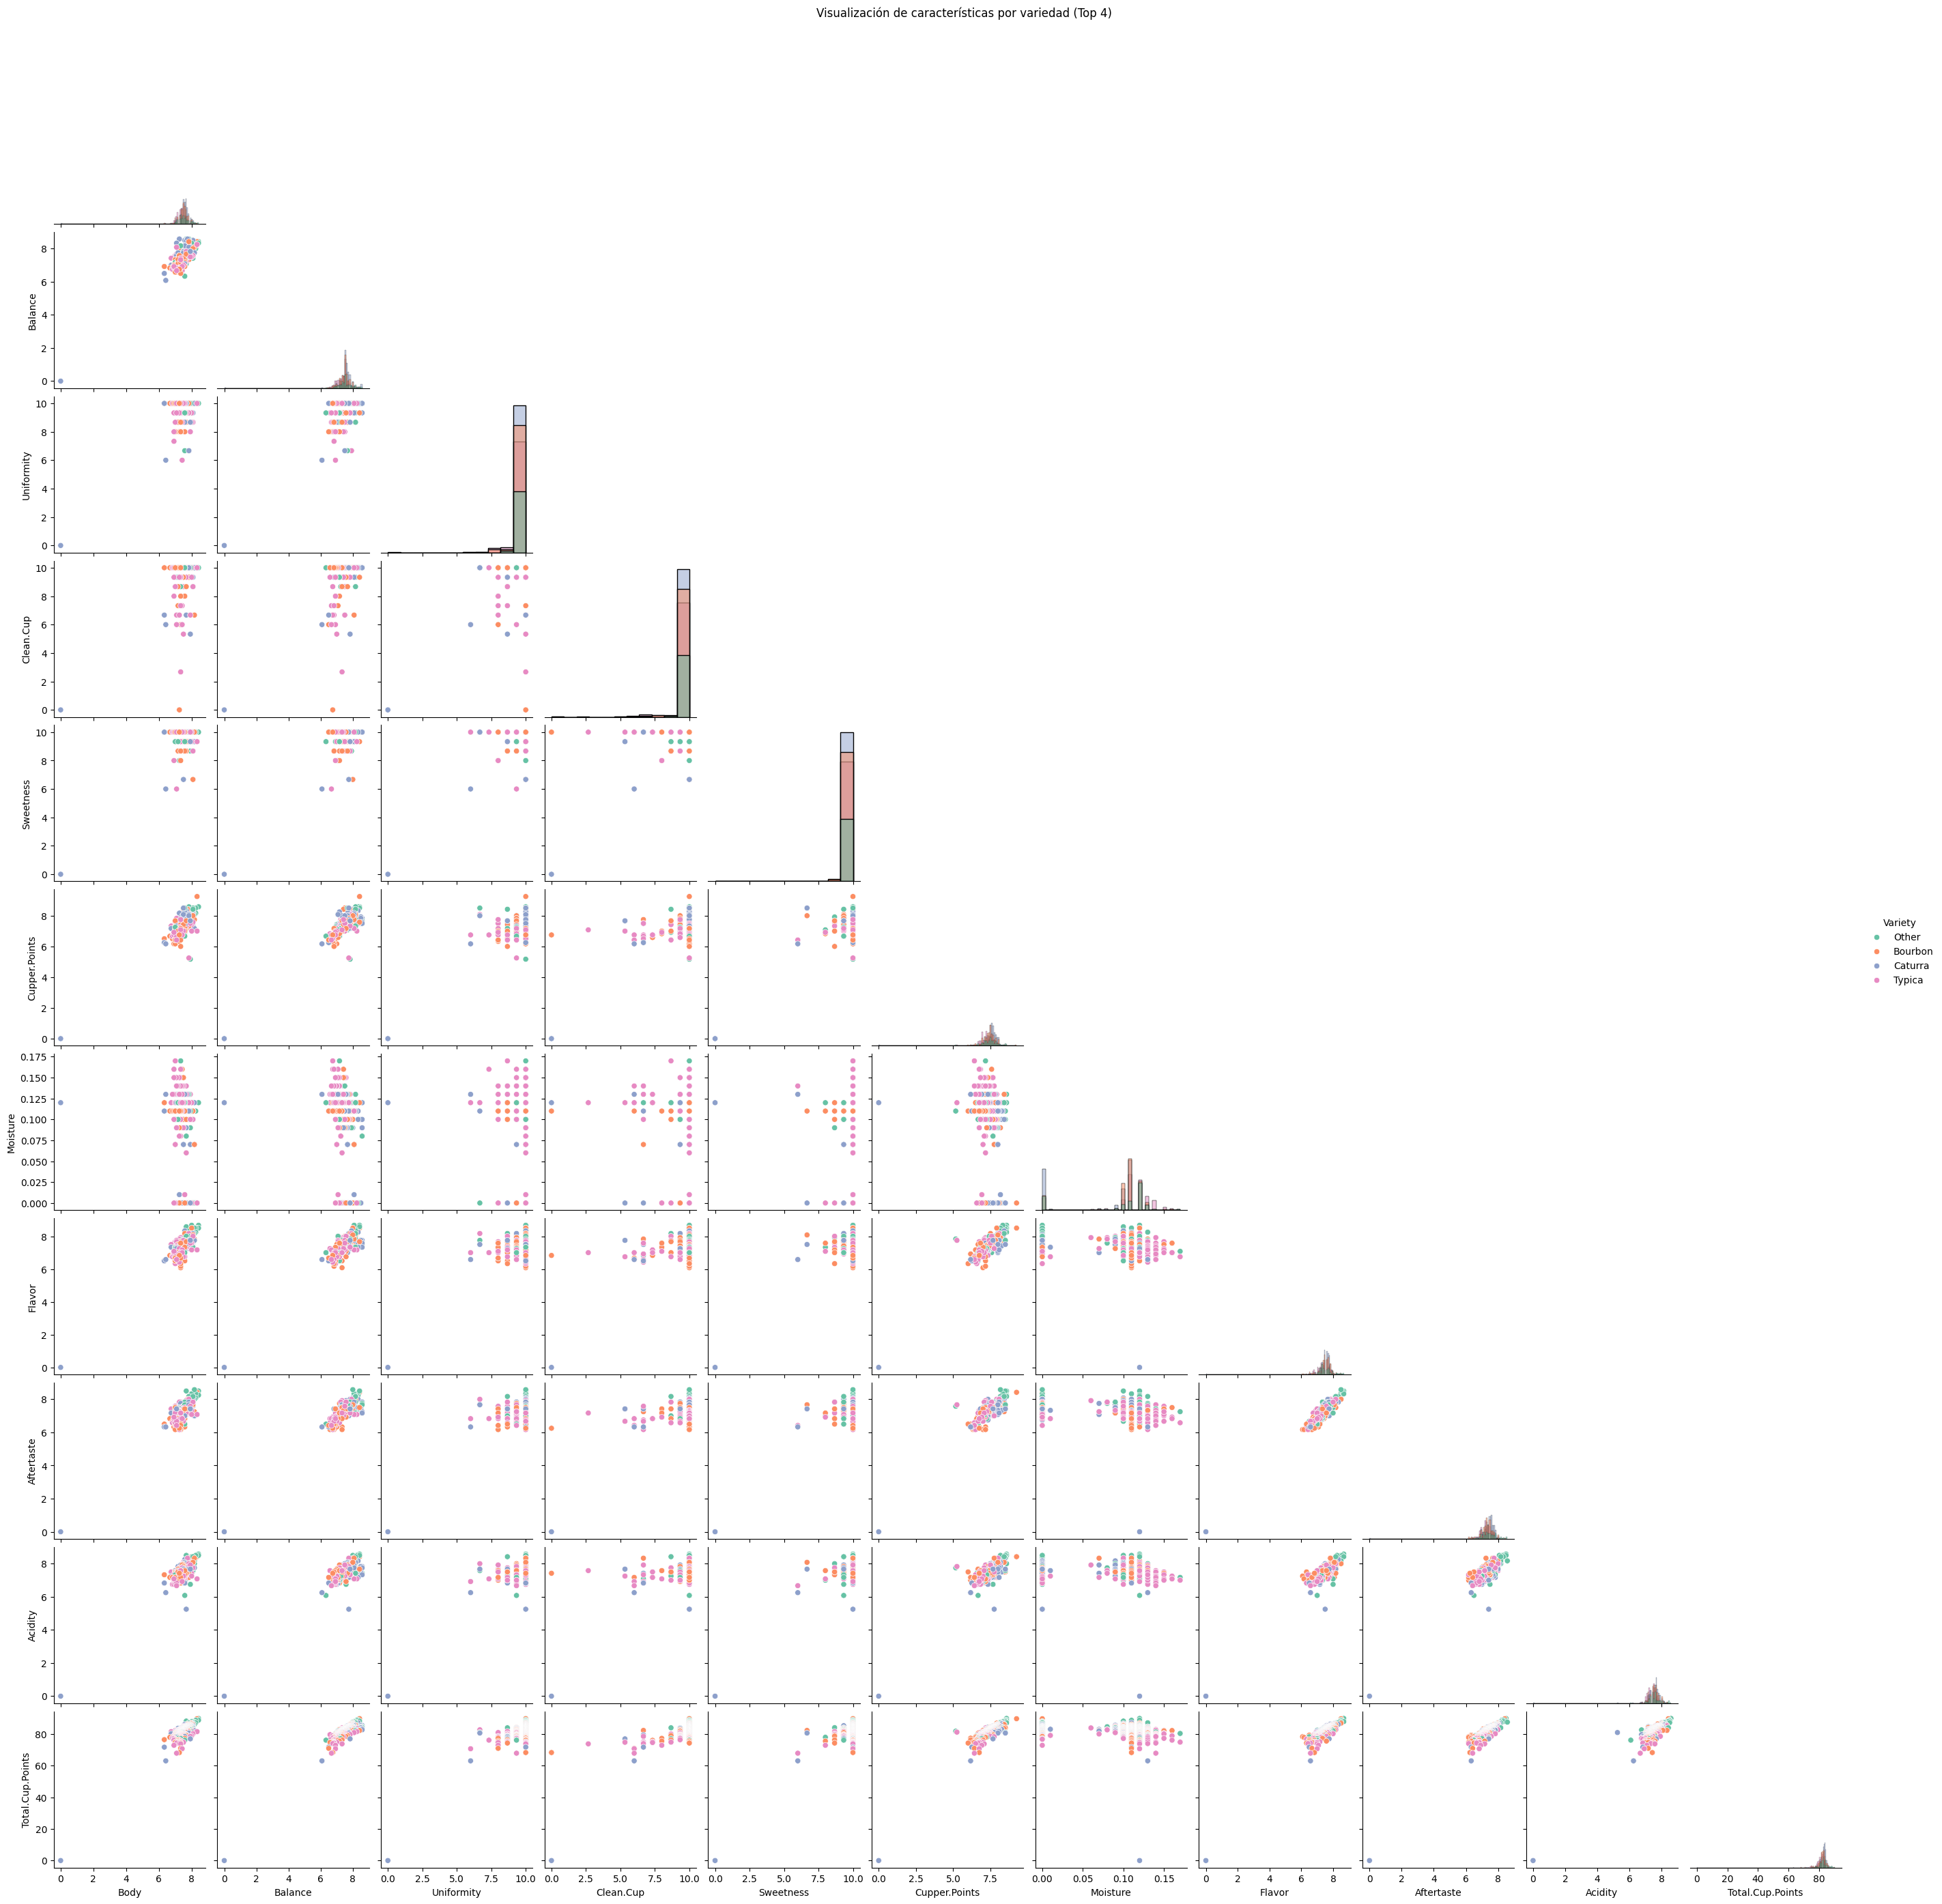

In [ ]:
# Obtener las 4 variedades más frecuentes
top_varieties = df['Variety'].value_counts().nlargest(4).index

# Filtrar el DataFrame
df_top = df[df['Variety'].isin(top_varieties)].reset_index(drop=True)
columnas_numericas = ['Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Moisture', 'Flavor', 'Aftertaste', 'Acidity','Total.Cup.Points']
df_pair = df_top[columnas_numericas + ['Variety']]
sns.pairplot(data=df_pair, hue='Variety', diag_kind='hist', palette='Set2', corner=True)
plt.suptitle('Visualización de características por variedad (Top 4)', y=1.02)
plt.show()


In [ ]:
X = df_top[columnas_numericas]
y = df_top['Variety']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred));

Reporte de clasificación:
              precision    recall  f1-score   support

     Bourbon       0.40      0.46      0.42        68
     Caturra       0.42      0.40      0.41        77
       Other       0.64      0.28      0.39        32
      Typica       0.39      0.46      0.42        63

    accuracy                           0.42       240
   macro avg       0.46      0.40      0.41       240
weighted avg       0.44      0.42      0.42       240

Matriz de confusión:
[[31 20  3 14]
 [23 31  1 22]
 [ 5  9  9  9]
 [19 14  1 29]]


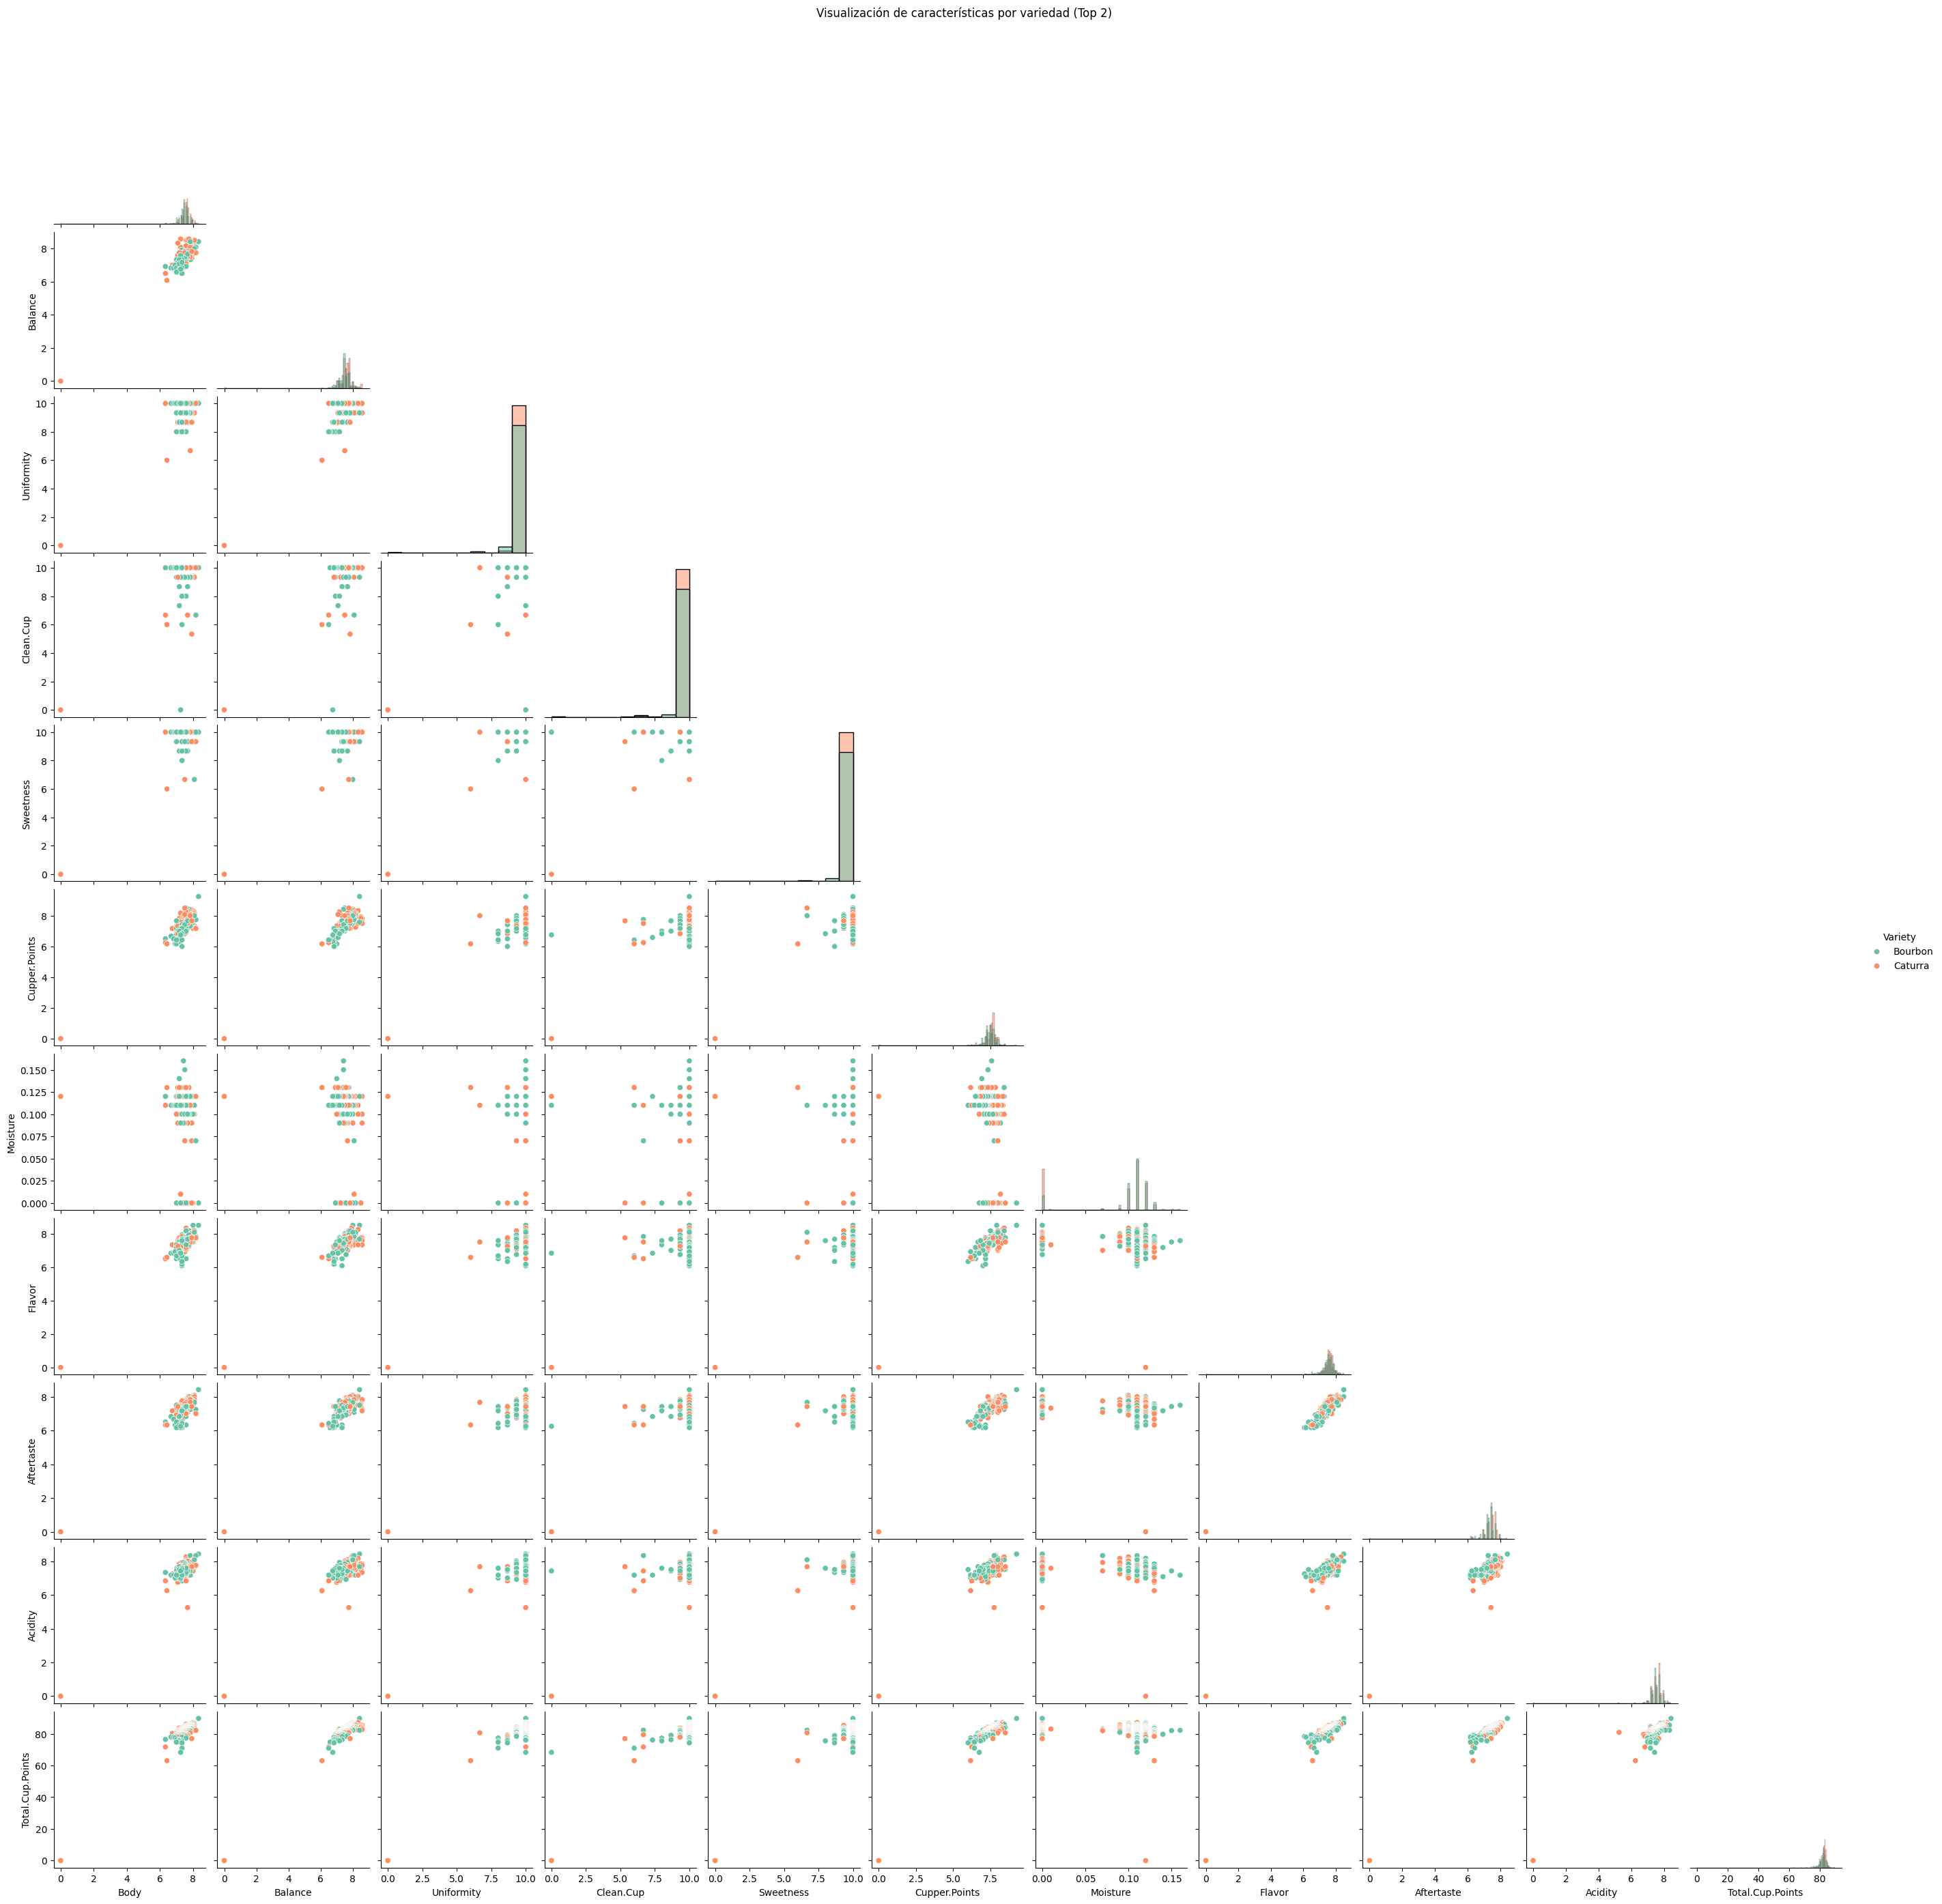

In [ ]:
# Obtener las 2 variedades más frecuentes
top_varieties = df['Variety'].value_counts().nlargest(2).index
# Filtrar el DataFrame
df_top = df[df['Variety'].isin(top_varieties)].reset_index(drop=True)
columnas_numericas = ['Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Moisture', 'Flavor', 'Aftertaste', 'Acidity','Total.Cup.Points']
df_pair = df_top[columnas_numericas + ['Variety']]
sns.pairplot(data=df_pair, hue='Variety', diag_kind='hist', palette='Set2', corner=True)
plt.suptitle('Visualización de características por variedad (Top 2)', y=1.02)
plt.show()

In [ ]:
X = df_top[columnas_numericas]
y = df_top['Variety']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Reporte de clasificación:
              precision    recall  f1-score   support

     Bourbon       0.55      0.63      0.59        68
     Caturra       0.63      0.55      0.58        77

    accuracy                           0.59       145
   macro avg       0.59      0.59      0.59       145
weighted avg       0.59      0.59      0.59       145

Matriz de confusión:
[[43 25]
 [35 42]]


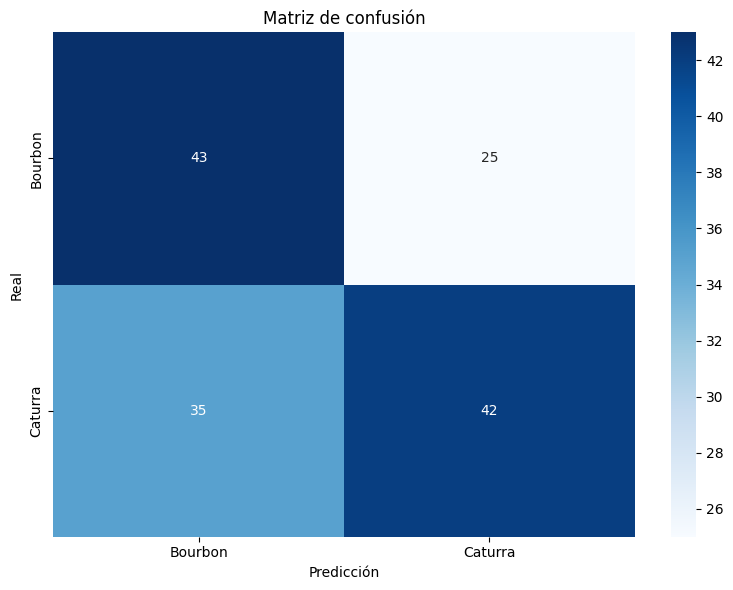

In [ ]:
y_pred = clf.predict(X_test)

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred));

clases = sorted(y_test.unique())
cm = confusion_matrix(y_test, y_pred, labels=clases)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=clases,
            yticklabels=clases)

plt.title('Matriz de confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

## 6.0 **Conclusión**
---


En el conjunto de prueba, había 68 muestras reales que eran de la variedad Bourbon. El modelo identificó correctamente 63% de los cafés que realmente eran Bourbon. Es decir, recuperó 43 de 68 aproximadamente (43 verdaderos positivos).
De todos los cafés que el modelo predijo como Bourbon, solo el 55% realmente lo eran. Es decir, el modelo hizo varias predicciones incorrectas de Bourbon (falsos positivos).
Es una combinación de Precision y Recall. En este caso, muestra que el modelo tiene un rendimiento moderado para la clase Bourbon, pero no es excelente.

En el conjunto de prueba, había 77 muestras reales que eran de la variedad Caturra. El modelo identificó correctamente 55% de los cafés que realmente eran Caturra.De todos los cafés que el modelo predijo como Caturra, solo el 63% realmente lo eran. Es decir, el modelo hizo algunas predicciones incorrectas de Caturra (falsos positivos).
Es una combinación de Precision y Recall. En este caso, muestra que el modelo tiene un rendimiento moderado para la clase Caturra, pero tampoco es excelente.




## **Referencias**
---
* [Time Series Machine Learning Regression Framework](https://towardsdatascience.com/time-series-machine-learning-regression-framework-9ea33929009a)
* [How (not) to use Machine Learning for time series forecasting: Avoiding the pitfalls](https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424)
* [Analytics Vidhya - Time Series Forecasting using Python](https://courses.analyticsvidhya.com/courses/creating-time-series-forecast-using-python/)
* [3Blue1Brown - Neural Networks (Lista de reproducción de *YouTube*)](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)
* [Knut Hinkelmann - Neural Networks](http://didattica.cs.unicam.it/lib/exe/fetch.php?media=didattica:magistrale:kebi:ay_1718:ke-11_neural_networks.pdf)
* [MIT Press book - Deep learning book](https://www.deeplearningbook.org/)

